In [1]:
#| echo: false
import warnings
warnings.filterwarnings("ignore")

### Importing libreries


In [2]:
from aippa.utils import PotDataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from aippa.descriptors import Vectorization
from aippa.DimensionReduction import PrincipalComponentAnalysis, LDA
from aippa.visualization import ScatterImage

### Instance potds class


In [3]:
#| echo: false
potds = PotDataset(r"C:\Users\larth\Documents\aippa\examples\pots_data", r"C:\Users\larth\Documents\aippa\Exporting_query_eng.xlsx")

##### Select data: Pianello di Genga Necropolis


In [4]:
info_selected = potds.info[(potds.info.context == "Pianello di Genga")] 

### Features extraction
Due to the use of PCA, Vectorization is used


In [5]:
vector = Vectorization(potds[info_selected.index])

Extracting vector: 100%|██████████| 250/250 [00:00<?, ?it/s]


### Performs PCA
PCA is performed, 5 components are chosen so that the amount of variance explained can be displayed cumulatively.
The `verbosity` parameter allows some information about the principal components to be displayed, such as the size of the output and the explained variance.


In [6]:
pca = PrincipalComponentAnalysis(vector, info_selected = info_selected, n_components=5, verbosity=True)

Original dimension: (250, 65536)
Output dimension: (250, 5)
First 5 components variance: [0.20065555 0.10966728 0.05086821 0.04733037 0.03852975]


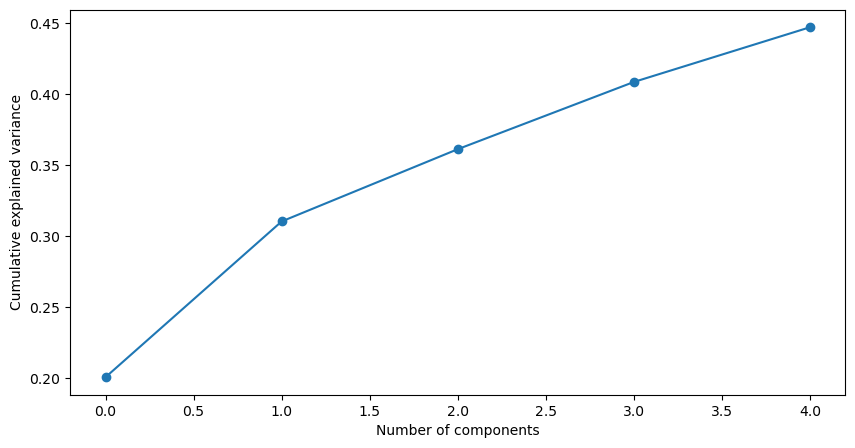

In [7]:
pca.Explained_variance_cumulative_plot(savefig=False, figsize=(10,5))

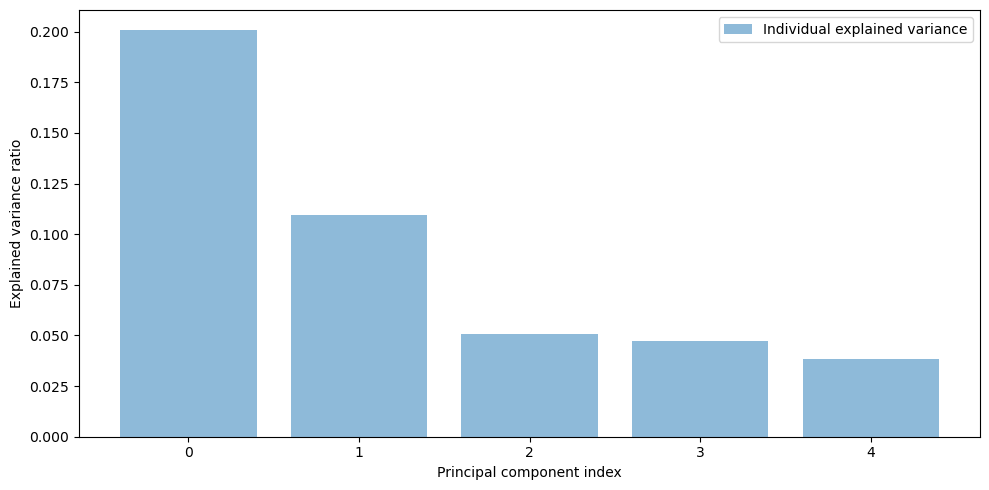

In [8]:
pca.Explained_variance_plot(savefig=False, figsize=(10,5))

The first two principal components were chosen for visualisation, as they explain most of the variance. This two-dimensional representation makes it possible to appreciate the global structure of the context, which is characterised predominantly by the presence of two groups.


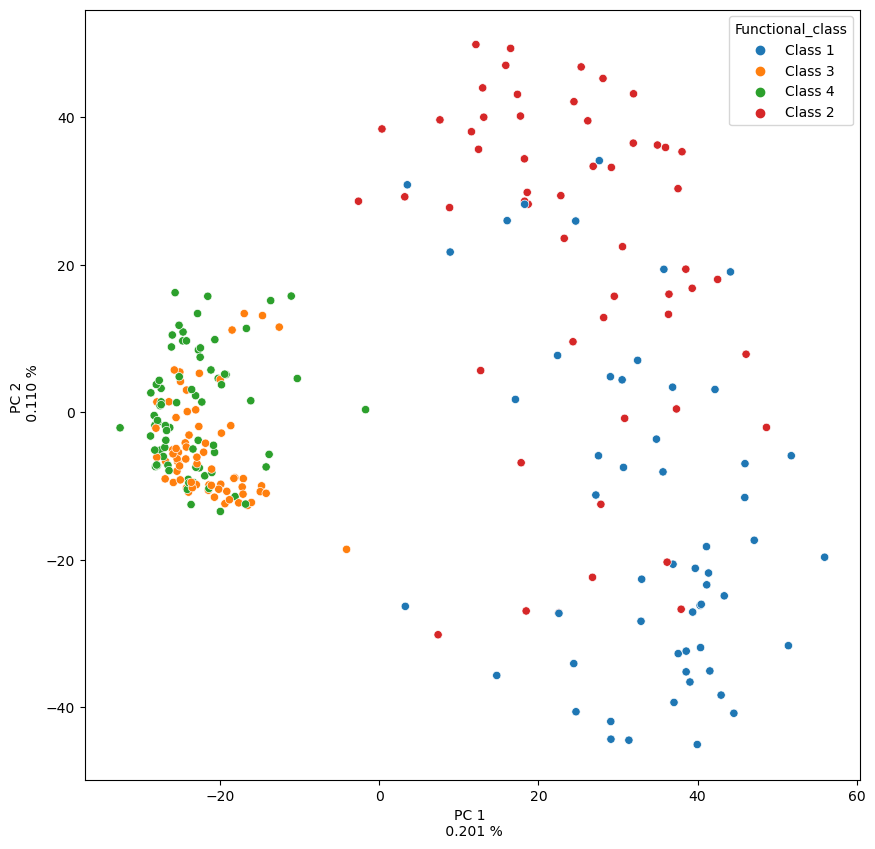

In [9]:
pca.ScatterPlot(savefig=False, legend_outside = False, hue = info_selected.Functional_class)

it is possible to explore the global structure of the context through the interactive scatterplot


In [10]:
ScatterImage(pca.reduction, info_selected, potds, output="notebook", hue=info_selected.Functional_class, hover_data=["Functional_class", "funeral_function","wide_chronology", "Morphology"])

Loading BokehJS ...

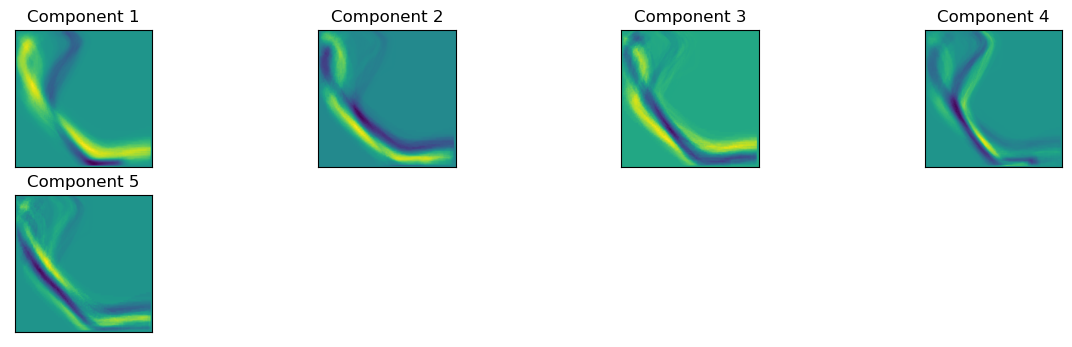

In [11]:
pca.PlotEigenPots(savefig=True)